# genetic algorithm

# Initial Code Explanation
# Traveling Salesman

Amir Ali Amini 610399102

# Initial Code Explanation
## Traveling Salesman
Amir Ali Amini 610399102

We use the same previous code with the difference that we completely change the fitness function to return a number representing the total distance between adjacent cities, with smaller numbers being more valuable. The goal is to create offspring from parents with lower fitness.

Since this problem is a type of optimization, we need to increase the exploration, but we don't need to reduce exploitation too much. Therefore, I attempted to increase exploration by raising the mutation probability and the mutation amount, but I did not significantly decrease the exploitation in the creation of new offspring. Each time, the algorithm selects the best parent from a pool of 20 candidates for both the mother and the father.

At the start of the algorithm, I read the coordinates to find the distances and calculated the distance between each pair, storing these values in a matrix. The matrix forms a graph where the weight of each edge represents the distance between two adjacent vertices.

Additionally, to enhance exploration, I swapped the new offspring with the least valuable existing offspring, regardless of their fitness, even if a new offspring may have lower value than the parent it replaces. Ultimately, I found that this method did not have a positive effect, so I reverted to the original method of replacing offspring with their more fit parents.


In [ ]:
import random
import numpy as np
import time
from math import sqrt
MAX_INT = 1000000

class geneticAlgorithm:
    def __init__(self, pop_size, n_city, coordinates):
        self.n_city = n_city
        self.coordinates = coordinates 
        self.distance_matrix = [ [MAX_INT for i in range(n_city)] for j in range(n_city)]
        self.path = []
        self.pop_size = pop_size
        self.population = [np.array(random.sample(range(self.n_city), self.n_city)) for i in range(pop_size)]
        self.fitness_arr = [0 for i in range(self.pop_size)]
        self.calc_distance_matrix()
        self.fitness_array_function()

    def calc_distance_matrix(self):
        for i in range(self.n_city):
            for j in range(self.n_city):
                self.distance_matrix[i][j] = sqrt((self.coordinates[i][0] - self.coordinates[j][0])**2 + (self.coordinates[i][1] - self.coordinates[j][1])**2)

    def sort_pop_by_fitness(self):
        n = self.pop_size
        swapped = False
        for i in range(n):
            for j in range(0, n-i-1):
                if self.fitness_arr[j] > self.fitness_arr[j + 1]:
                    swapped = True
                    self.fitness_arr[j], self.fitness_arr[j +
                                                          1] = self.fitness_arr[j + 1], self.fitness_arr[j]
                    self.population[j], self.population[j +
                                                        1] = self.population[j + 1], self.population[j]
            if not swapped:
                return

    def fitness_function(self, chromosome):
        fitness_value = 0
        for i in range(self.n_city-1):
            fitness_value += self.distance_matrix[ chromosome[i] ][ chromosome[i+1] ]
        fitness_value += self.distance_matrix[ chromosome[self.n_city-1] ][ chromosome[0] ]

        return fitness_value

    def fitness_array_function(self):
        for ind in range(self.pop_size):
            current_fitness = self.fitness_function(self.population[ind])
            self.fitness_arr[ind] = current_fitness
        return self.fitness_arr

    def crossover(self, chromosome_A, chromosome_B):
        n = len(chromosome_A)
        point1 = random.randint(0, n-2)
        point2 = random.randint(point1+1, n-1)
        child1 = [None]*n
        child2 = [None]*n
        child1[point1:point2] = chromosome_A[point1:point2]
        child2[point1:point2] = chromosome_B[point1:point2]
        for i in range(n):
            if child1[i] == None:
                if chromosome_B[i] not in child1:
                    child1[i] = chromosome_B[i]
            if child2[i] == None:
                if chromosome_A[i] not in child2:
                    child2[i] = chromosome_A[i]
        for i in range(n):
            if child1[i] == None:
                for j in range(n):
                    if j not in child1:
                        child1[i] = j
            if child2[i] == None:
                for j in range(n):
                    if j not in child2:
                        child2[i] = j
        child1_fitness = self.fitness_function(child1)
        child2_fitness = self.fitness_function(child2)
        if child1_fitness < child2_fitness:
            return child1
        return child2

    def mutation(self, chromosome):
        n = self.n_city
        index1 = random.randint(0, n-2)
        index2 = random.randint(index1+1, n-1)
        permuted = chromosome[index1:index2]
        np.random.shuffle(permuted)
        return  chromosome[0:index1]+ permuted+ chromosome[index2:]


    def select(self, method='tournoment'):
        if method == 'tournoment':
            new_generation = []
            for i in range(0, self.pop_size):
                random_candidates = np.array(
                    random.sample(range(self.pop_size), 20))
                min_index1 = min(random_candidates,
                                 key=lambda j: self.fitness_arr[j])
                first_parent = (
                    min_index1, self.population[min_index1], self.fitness_arr[min_index1])
                random_candidates = np.array(
                    random.sample(range(self.pop_size), 5))
                min_index2 = min(random_candidates,
                                 key=lambda j: self.fitness_arr[j])
                second_parent = (
                    min_index2, self.population[min_index2], self.fitness_arr[min_index2])

                new_child = self.crossover(first_parent[1], second_parent[1])

                new_child = self.mutation(new_child)
                new_generation.append(new_child)

            new_generation.sort(key=lambda item: self.fitness_function(item))
            self.sort_pop_by_fitness()
            new_gen_len = len(new_generation)
            for index in range(new_gen_len-1,-1,-1):
                if self.fitness_function(new_generation[index]) < self.fitness_arr[self.pop_size-1-new_gen_len-1+index]:
                    self.population[index] = new_generation[index]
            self.sort_pop_by_fitness()
            self.fitness_arr = self.fitness_array_function()
            self.fitness_arr = self.fitness_array_function()



## input

In this section, I read the data of the cities (I changed the file so that it only contains the coordinates, eliminating the need to ignore the first and last lines).


In [6]:
file = open("gr229.tsp", "r")
Lines = file.readlines()
coords=[]
for line in Lines:
    city = (list(line.split(' '))[2:])
    print(city)
    coords.append( ( float(city[0]) , float(city[1][:-2]) ) )

['68.58', '33.05\n']
['64.34', '40.32\n']
['59.55', '30.15\n']
['59.25', '24.45\n']
['56.57', '24.06\n']
['54.43', '20.30\n']
['54.41', '25.19\n']
['53.54', '27.34\n']
['49.50', '24.00\n']
['50.26', '30.31\n']
['46.28', '30.44\n']
['55.45', '37.35\n']
['56.20', '44.00\n']
['55.45', '49.08\n']
['53.12', '50.09\n']
['51.40', '39.10\n']
['50.00', '36.15\n']
['48.27', '34.59\n']
['44.36', '33.32\n']
['47.14', '39.42\n']
['48.44', '44.25\n']
['46.21', '48.03\n']
['41.43', '44.49\n']
['40.11', '44.30\n']
['40.23', '49.51\n']
['58.00', '56.15\n']
['56.51', '60.36\n']
['67.27', '63.58\n']
['69.20', '88.06\n']
['55.00', '73.24\n']
['55.02', '82.55\n']
['56.01', '92.50\n']
['49.50', '73.10\n']
['43.15', '76.57\n']
['41.20', '69.18\n']
['39.40', '66.48\n']
['38.35', '68.48\n']
['43.48', '87.35\n']
['52.16', '104.20\n']
['47.55', '106.53\n']
['52.03', '113.30\n']
['62.13', '129.49\n']
['64.45', '177.29\n']
['53.01', '158.39\n']
['59.34', '150.48\n']
['50.17', '127.32\n']
['50.35', '137.02\n']
['48

# generate

Since cities with lower fitness are more valuable (in this problem), I find the minimum fitness of each chromosome in the generation and store it for the chart.


In [12]:

tsp = geneticAlgorithm(500, len(coords), coords)
ith_gen = 0
x=[]
y=[]
while (min(tsp.fitness_arr) > 2800):
    tsp.select()
    x.append(ith_gen)
    y.append(min(tsp.fitness_arr))
    print(min(tsp.fitness_arr))
    ith_gen+=1
for i in tsp.population[0]:
    print(str(coords[i]), end='')
print(f'\nnumber of city: ', tsp.n_city)
print(f'population size: ', tsp.pop_size)
print(ith_gen, 'th generation')
print('minimum distance is: ', min(tsp.fitness_arr))


12853.162135160173
11502.886737414687
9617.109683396098
8887.310661336496
8484.023715515264
8368.553591588228
8420.841043694276
7874.850630567202
7604.07659048031
7248.903765992672
7258.668820746922
7213.847431483311
7038.838217695636
6845.739499893977
6739.124844732123
6379.964756505332
6118.060397807478
6079.292350439476
6051.079737377836
5918.999574284327
5592.04819278602
5643.361222300034
5570.405370357015
5323.905351067116
5228.140726560083
5226.881537256463
5190.395847109682
5134.344612411616
5092.349379996075
5035.572635585856
5013.434835716378
4956.13369701435
4932.3882421390545
4826.696547496983
4798.006861113349
4761.094247960215
4700.392751928115
4692.344674185774
4717.275636722414
4683.488843678815
4679.104086268817
4640.949096941487
4616.581781715965
4595.16147506655
4577.051924440118
4570.450815792733
4522.0100771552325
4460.666595463292
4452.572300309917
4454.09792894266
4347.910488672976
4349.660604736681
4314.271395604885
4275.97495954956
4259.251561299071
4227.2863346

## garph

Since I tried to increase exploration significantly, the obtained fitness values are not always decreasing; sometimes they fluctuate (not just sometimes, but after a certain point, they fluctuate quite a bit). However, overall, they show a decreasing trend. As the fitness decreases, the rate of decrease also slows down significantly, creating a somewhat logarithmic length on the chart.

At the end, it became very slow; my laptop was struggling to keep up! It's strange that my laptop works faster than Colab! Eventually, it got stuck at this value, fluctuating by just one or two meters. I think it won’t go lower than this; it has been stuck here for about 5 minutes.

Overall, I let it run for about 25 minutes to see if it would drop on this laptop. Oh, it started decreasing again! 😀


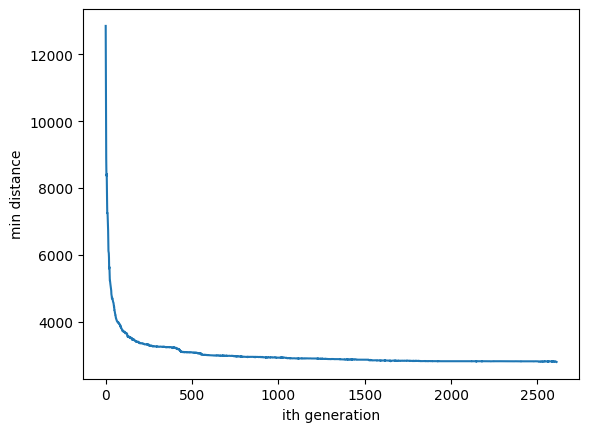

In [15]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")
plt.show()

# input 2

In this one, we probably won't reach the desired result because the previous run took 25 minutes, and this one will likely take much longer. But I'll let it run to see what happens.


In [19]:
file = open("pr1002.tsp", "r")
Lines = file.readlines()
coords=[]
for line in Lines:
    city = (list(line.split(' '))[1:])
    coords.append( ( float(city[0]) , float(city[1][:-2]) ) )

It's not generating the generations at all; even though I set the population to 30, it's progressing very slowly.


In [21]:

tsp = geneticAlgorithm(30, len(coords), coords)
ith_gen = 0
x=[]
y=[]
while (min(tsp.fitness_arr) > 16000):
    tsp.select()
    x.append(ith_gen)
    y.append(min(tsp.fitness_arr))
    print(ith_gen , min(tsp.fitness_arr))
    ith_gen+=1
for i in tsp.population[0]:
    print(str(coords[i]), end='')
print(f'\nnumber of city: ', tsp.n_city)
print(f'population size: ', tsp.pop_size)
print(ith_gen, 'th generation')
print('minimum distance is: ', min(tsp.fitness_arr))


0 3986172.1287949984
1 3637678.008370362
2 3232244.5935537475
3 2955671.203345941
4 2851589.4289513356
5 2719135.032973806
6 2583040.4189149104
7 2551056.522043365
8 2521380.621747171
9 2489942.0664920844
10 2459293.622678585
11 2459214.1077094837
12 2441921.4233995043
13 2378486.0521593727
14 2378634.9191565905
15 2368665.582751362
16 2366501.8611453543
17 2354164.731158125
18 2313554.52668713
19 2313212.429475318
20 2304547.819500723
21 2286692.742480578
22 2291221.0553916837
23 2287046.789925066
24 2270973.9156118543
25 2272964.4834644445
26 2277232.903687447
27 2272217.1457421174
28 2277199.409777175
29 2276453.147858186
30 2270889.0745456596
31 2267988.2679467527
32 2266911.5611540307
33 2257133.6034132233
34 2263351.5316812457
35 2267455.9760334035
36 2262846.338214005
37 2262176.291816757
38 2258570.6273991424
39 2262766.714710244
40 2257963.634199256
41 2257500.325350725
42 2262547.306984739
43 2258522.0643758
44 2258044.0471816338
45 2260128.055851059
46 2260128.055851059
47 2

KeyboardInterrupt: 

Right now, it's stuck at around 1,800,000 after about two hundred generations. I think one major reason for this is the low population, but I can't increase it further because it would take much longer. I'll let it run a bit more to see if it returns the best result. 

Even now, it’s providing about ten percent more, but I doubt it will reach that amount.


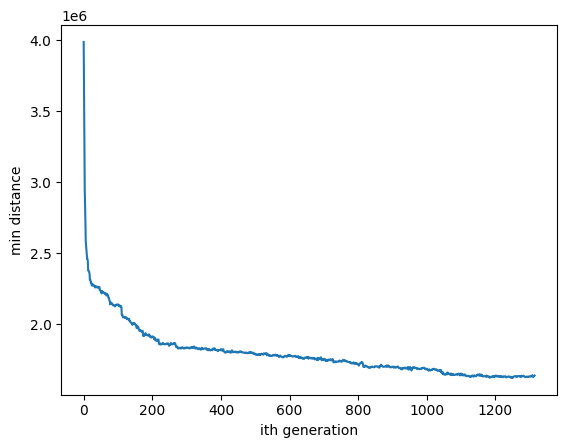

In [22]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")
plt.show()